# Welcome

Let's begin.
This is just a small test to print some info about your current machine arch.

In [8]:
import platform

print(platform.machine())

aarch64


# What is DocArray?

- It’s like JSON, but for intensive computation.
- It’s like numpy.ndarray, but for unstructured data.
- It’s like pandas.DataFrame, but for nested and mixed media data with embeddings.
- It’s like Protobuf, but for data scientists and deep learning engineers.

If you are a data scientist who works with image, text, video, audio data in Python all day, you should use DocArray: it can greatly accelerate the work on representing, embedding, matching, visualizing, evaluating, sharing data; while staying close to your favorite toolkits, e.g. Torch, TensorFlow, ONNX, PaddlePaddle, JupyterLab, Google Colab.

If you are a deep learning engineer who works on scalable deep learning services, you should use DocArray: it can be the basic building block of your system. Its portable data structure can be wired in Protobuf, compressed bytes, JSON; allowing your engineer friends to happily integrate it into the production system.

This is DocArray: a unique one, aiming to be your data structure for unstructured data.

## Document with Text

An example of Document using uri parameter and downloading the data.

In [9]:
from docarray import Document

d = Document(text="Hello World")
d.summary()

📄 Document: 54a2045b92637861f7b0e5dd7a0344b2
╭────────────────────────────────────┬─────────────────────────────────────────╮
│ Attribute                          │ Value                                   │
├────────────────────────────────────┼─────────────────────────────────────────┤
│ text                               │ Hello World                             │
╰────────────────────────────────────┴─────────────────────────────────────────╯

Every `Document` has an id.

In [21]:
d.id

'9d353ca5dd6705ba9213232a828b0f07'

Document can only be of one type.
For example: text, tensor, ...

In [22]:
d.content_type

'tensor'

List all non empty fields inside a `Document`.

In [8]:
d.non_empty_fields

('id', 'text')

In [11]:
from docarray import Document

d = Document(uri='https://www.w3.org/History/19921103-hypertext/hypertext/README.html')
d.load_uri_to_text()

d.summary()

📄 Document: 46b41a101851dae08bf2ac55e883bbc2
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ mime_type │ text/html                                                        │
│ text      │ <TITLE>Read Me</TITLE>                                           │
│           │ <NEXTID 7>                                                       │
│           │ <H1>WorldWideWeb distributed code</H1>See the CERN <A NAME=2     │
│           │ HREF=... [dim](length: 7037)                                     │
│ uri       │ https://www.w3.org/History/19921103-hypertext/hypertext/README.… │
╰───────────┴──────────────────────────────────────────────────────────────────╯

Get current content of a Document.

In [16]:
d.content

'Hello World'

Override content.

In [31]:
d.tensor = [1, 2, 3]
print(d.content_type)
print(d.content)

tensor
[1, 2, 3]


Document with Image

In [6]:
from docarray import Document

d = Document(uri="../images/green-apple.png")
d.load_uri_to_image_tensor()
d.summary()

📄 Document: 0d38315d7afdc3088904d3470f89159d
╭────────────┬─────────────────────────────────────────────────────────────────╮
│ Attribute  │ Value                                                           │
├────────────┼─────────────────────────────────────────────────────────────────┤
│ tensor     │ <class 'numpy.ndarray'> in shape (1000, 945, 3), dtype: uint8   │
│ mime_type  │ image/png                                                       │
│ uri        │ ../images/green-apple.png                                       │
╰────────────┴─────────────────────────────────────────────────────────────────╯

Print tensor and shape of it.

In [33]:
print(d.tensor, d.tensor.shape)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] (1000, 945, 3)


## Simple image processing

DocArray provides some functions to help you preprocess the image data.

You can resize it (i.e. downsampling/upsampling) and normalize it; you can switch the channel axis of the .tensor to meet certain requirements of other framework; and finally you can chain all these preprocessing steps together in one line.

For example, before feeding data into a Pytorch-based ResNet Executor, the image needs to be normalized and the color axis should be at first, not at the last.

You can do this via:

In [4]:
from docarray import Document

d = (
    Document(uri="../images/pear.png")
    .load_uri_to_image_tensor()
    .set_image_tensor_shape(shape=(224, 224))
    .set_image_tensor_normalization()
    .set_image_tensor_channel_axis(-1, 0)
)

print(d.tensor, d.tensor.shape)

[[[-2.117904  -2.117904  -2.117904  ... -2.117904  -2.117904  -2.117904 ]
  [-2.117904  -2.117904  -2.117904  ... -2.117904  -2.117904  -2.117904 ]
  [-2.117904  -2.117904  -2.117904  ... -2.117904  -2.117904  -2.117904 ]
  ...
  [-2.117904  -2.117904  -2.117904  ... -2.117904  -2.117904  -2.117904 ]
  [-2.117904  -2.117904  -2.117904  ... -2.117904  -2.117904  -2.117904 ]
  [-2.117904  -2.117904  -2.117904  ... -2.117904  -2.117904  -2.117904 ]]

 [[-2.0357141 -2.0357141 -2.0357141 ... -2.0357141 -2.0357141 -2.0357141]
  [-2.0357141 -2.0357141 -2.0357141 ... -2.0357141 -2.0357141 -2.0357141]
  [-2.0357141 -2.0357141 -2.0357141 ... -2.0357141 -2.0357141 -2.0357141]
  ...
  [-2.0357141 -2.0357141 -2.0357141 ... -2.0357141 -2.0357141 -2.0357141]
  [-2.0357141 -2.0357141 -2.0357141 ... -2.0357141 -2.0357141 -2.0357141]
  [-2.0357141 -2.0357141 -2.0357141 ... -2.0357141 -2.0357141 -2.0357141]]

 [[-1.8044444 -1.8044444 -1.8044444 ... -1.8044444 -1.8044444 -1.8044444]
  [-1.8044444 -1.80444

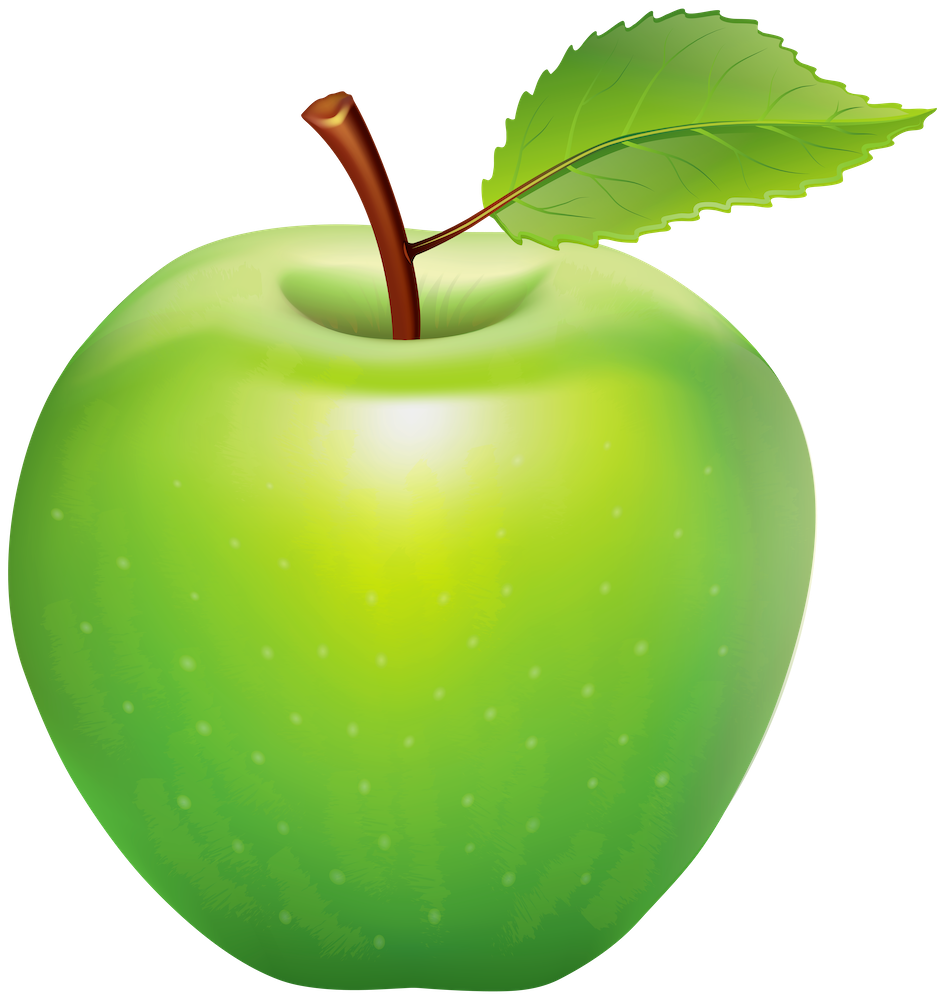

In [7]:
d.display()

# Chunks

...

In [3]:
from docarray import Document

d = Document(
    id='d0',
    chunks=[Document(id='d1', chunks=Document(id='d2'))],
    matches=[Document(id='d3')],
)

d.summary()

📄 Document: d0
├── 🔶 Matches
│   └── 📄 Document: d3
│       ╭────────────────────────────────────────────────┬─────────────────────────────╮
│       │ Attribute                                      │ Value                       │
│       ├────────────────────────────────────────────────┼─────────────────────────────┤
│       │ adjacency                                      │ 1                           │
│       ╰────────────────────────────────────────────────┴─────────────────────────────╯
└── 💠 Chunks
    └── 📄 Document: d1
        ╭───────────────────────────────────────────────────┬──────────────────────────╮
        │ Attribute                                         │ Value                    │
        ├───────────────────────────────────────────────────┼──────────────────────────┤
        │ parent_id                                         │ d0                       │
        │ granularity                                       │ 1                        │
        ╰───────────────────────────────────────────────────┴──────────────────────────╯
        └── 💠 Chunks
            └── 📄 Document: d2
                ╭───────────────────────────────────────────────────┬──────────────────────────╮
                │ Attribute                                         │ Value                    │
                ├───────────────────────────────────────────────────┼──────────────────────────┤
                │ parent_id                                         │ d1                       │
                │ granularity                                       │ 1                        │
                ╰───────────────────────────────────────────────────┴──────────────────────────╯

In [10]:
from docarray import Document
import numpy as np

d = Document(text='hello, world', embedding=np.array([1, 2, 3]))
d_as_json = d.to_json(protocol='protobuf')

print(d)
print(d, d_as_json)
print(d.embedding)

<Document ('id', 'text', 'embedding') at 53a8bba50654d3efc626f4d513b5900c>
<Document ('id', 'text', 'embedding') at 53a8bba50654d3efc626f4d513b5900c> {
  "id": "53a8bba50654d3efc626f4d513b5900c",
  "text": "hello, world",
  "embedding": {
    "dense": {
      "buffer": "AQAAAAAAAAACAAAAAAAAAAMAAAAAAAAA",
      "shape": [
        3
      ],
      "dtype": "<i8"
    },
    "clsName": "numpy"
  }
}
[1 2 3]


In [12]:
print(d.text)
print(d.content)
print(d.is_multimodal)

hello, world
hello, world
False
